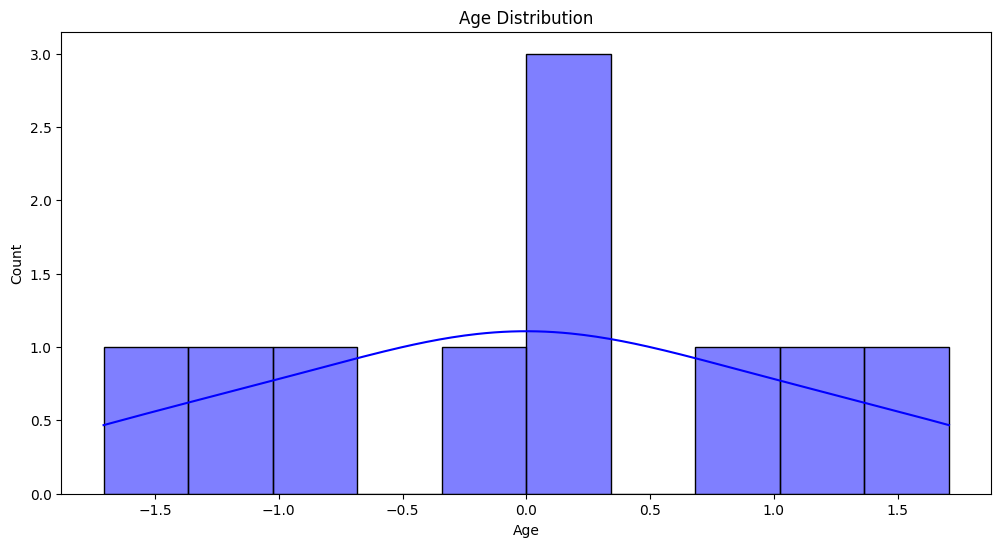

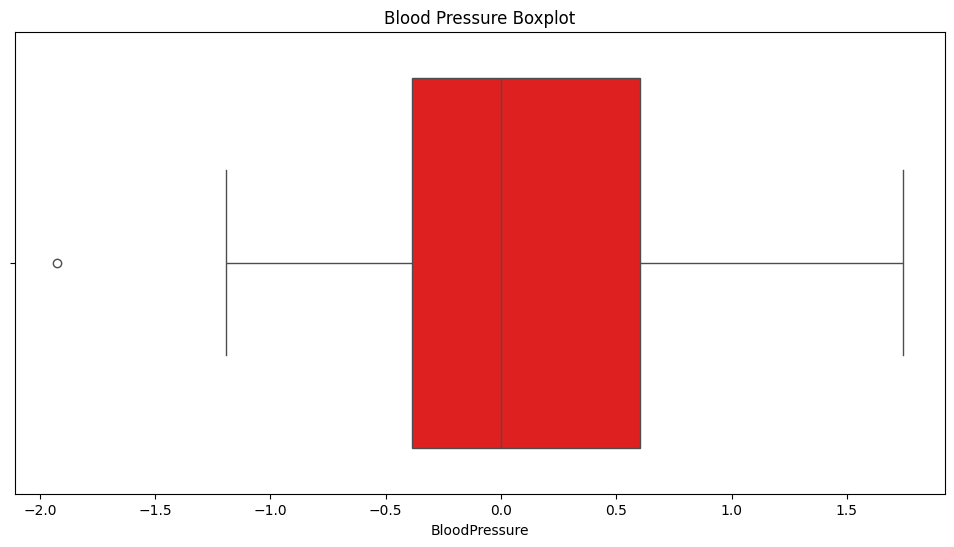

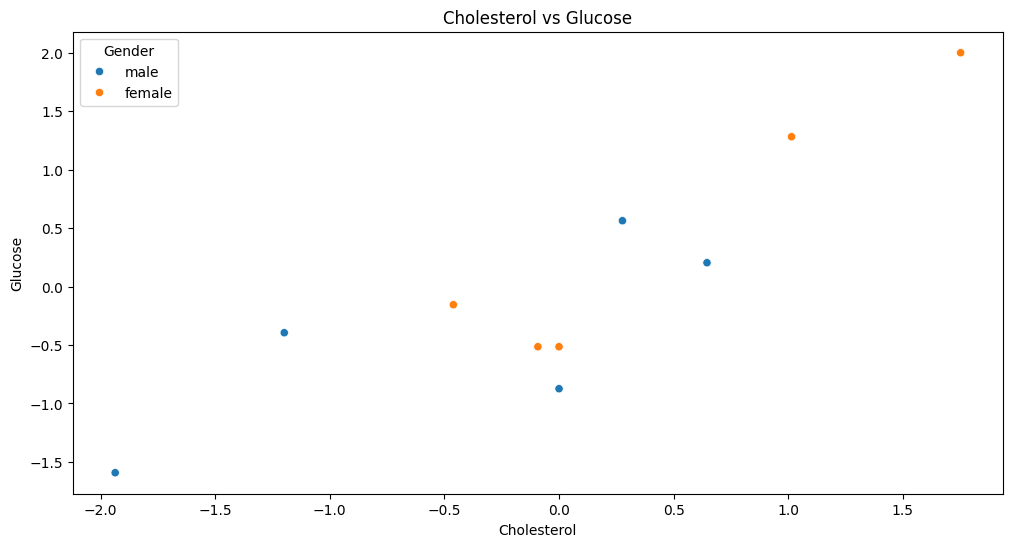

<ipython-input-11-3da8996f000e>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Diagnosis'], palette='coolwarm')


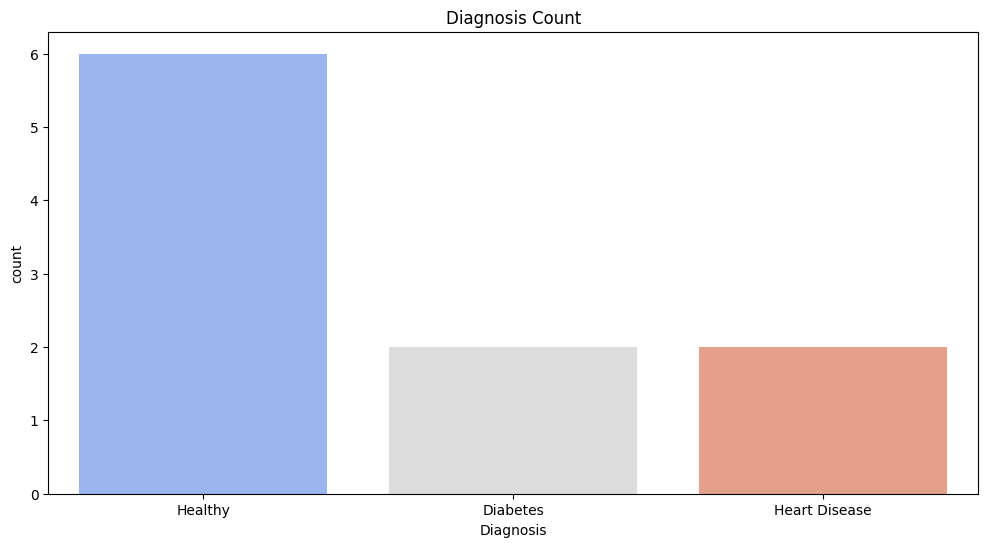

Cleaned Healthcare Dataset:
   PatientID       Age  BloodPressure  Cholesterol   Glucose  HeartRate  \
0          1 -1.707825      -1.925002    -1.936492 -1.591816  -1.960631   
1          2 -0.243975       1.008334    -0.461069 -0.155591   1.003114   
2          3  0.000000      -0.458334    -1.198781 -0.394962  -0.592749   
3          4  1.707825       0.000000     1.752064  1.998746   0.547153   
4          5 -0.731925       0.275000     0.000000 -0.873703  -0.136788   
5          6  0.731925       1.741669     1.014353  1.280634   1.687055   
6          7  0.000000      -1.191668     0.276642  0.562521   0.547153   
7          8  1.219875       0.000000     0.000000 -0.514647   0.319173   
8          9  0.243975       0.715001     0.645497  0.203465  -1.048710   
9         10 -1.219875      -0.165000    -0.092214 -0.514647  -0.364769   

   Gender      Diagnosis  
0    male        Healthy  
1  female       Diabetes  
2    male        Healthy  
3  female  Heart Disease  
4    male  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from google.colab import files

# Upload healthcare_data.csv
uploaded = files.upload()
df = pd.read_csv('healthcare_data.csv')

# 1. Handling Missing Data

# Numerical missing value imputation using mean strategy
num_imputer = SimpleImputer(strategy='mean')
df[['Age', 'BloodPressure', 'Cholesterol']] = num_imputer.fit_transform(df[['Age', 'BloodPressure', 'Cholesterol']])

# Categorical missing value imputation using most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Diagnosis']] = cat_imputer.fit_transform(df[['Diagnosis']])

# KNN Imputation for more sophisticated handling (optional)
knn_imputer = KNNImputer(n_neighbors=3)
df[['Glucose', 'HeartRate']] = knn_imputer.fit_transform(df[['Glucose', 'HeartRate']])

# 2. Handling Inconsistent Data

# Standardizing text case for categorical values
df['Gender'] = df['Gender'].str.lower().str.strip()

# Removing duplicate records
df = df.drop_duplicates()

# Standardizing numerical columns
scaler = StandardScaler()
df[['Age', 'BloodPressure', 'Cholesterol', 'Glucose', 'HeartRate']] = scaler.fit_transform(
    df[['Age', 'BloodPressure', 'Cholesterol', 'Glucose', 'HeartRate']]
)

# 3. Handling Noisy Data

# Removing outliers using Z-score
z_scores = np.abs(stats.zscore(df[['Age', 'BloodPressure', 'Cholesterol', 'Glucose', 'HeartRate']]))
df = df[(z_scores < 3).all(axis=1)]

# Save cleaned dataset to CSV file
df.to_csv('cleaned_healthcare_data.csv', index=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=10, color='blue')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['BloodPressure'], color='red')
plt.title('Blood Pressure Boxplot')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Cholesterol'], y=df['Glucose'], hue=df['Gender'])
plt.title('Cholesterol vs Glucose')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=df['Diagnosis'], palette='coolwarm')
plt.title('Diagnosis Count')
plt.show()

# Displaying the cleaned dataset
print("Cleaned Healthcare Dataset:")
print(df)
